In [1]:
# Copyright (c) 2019 ETH Zurich, Lukas Cavigelli, Georg Rutishauser, Luca Benini

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('axes', axisbelow=True)

from dataCollect import getModel, getFMs
from analysisTools import Analyzer

In [7]:
#instantiate dataset loader and pre-trained model
training = True

epoch = None
# modelName = 'resnet34'
# modelName = 'squeezenet'
modelName = 'alexnet'
# modelName = 'vgg16'
# modelName = 'mobilenet2'
# modelName, epoch = 'alexnet-cust', 54
# modelName, epoch = 'mobilenetV2-cust', 200

model, loss_func = getModel(modelName, epoch=epoch)

In [8]:
# gather sparsity data
model.eval()
analyzer = Analyzer(quantMethod='fixed16', compressor=None)
outputsReLU, _, _, _ = getFMs(model, loss_func, 
                              training=training, 
                              numBatches=1, batchSize=10)#250)

In [9]:
sparsitiesOutp = [[100*analyzer.getSparsity(batchOutp) 
                   for batchOutp in layerOutp]
                  for layerOutp in outputsReLU]
np.save('results/sparsityByLayer-boxplot-%s.npy' % modelName, sparsitiesOutp)

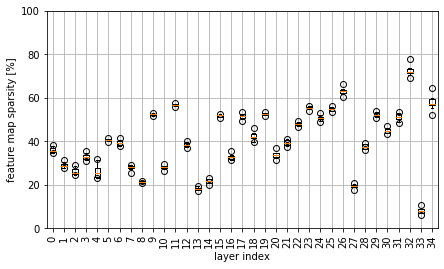

In [10]:
plt.subplots(figsize=(7,4))
layerNames = [lid for lid in range(len(sparsitiesOutp))] # 'Layer %d'
plt.boxplot(sparsitiesOutp, labels=layerNames, whis=[1,99])
plt.grid()
plt.xlabel('layer index')
plt.ylabel('feature map sparsity [%]')
plt.ylim(bottom=0, top=100)
plt.xticks(rotation=90)
plt.savefig('figs/sparsityByLayer-boxplot-%s.pdf' % modelName, bbox_inches='tight', pad_inches=0.0)

In [12]:
# using torchvision models: 
# make sure you run the above code for both networks first, such that the files are created
sparsitiesOutpAlexNet = np.load('results/sparsityByLayer-boxplot-alexnet.npy').tolist()
sparsitiesOutpMobileNetV2 = np.load('results/sparsityByLayer-boxplot-mobilenet2.npy').tolist()
# in the paper: 
# sparsitiesOutpAlexNet = np.load('results/sparsityByLayer-boxplot-alexnet-cust.npy').tolist()
# sparsitiesOutpMobileNetV2 = np.load('results/sparsityByLayer-boxplot-mobilenetV2-cust.npy').tolist()

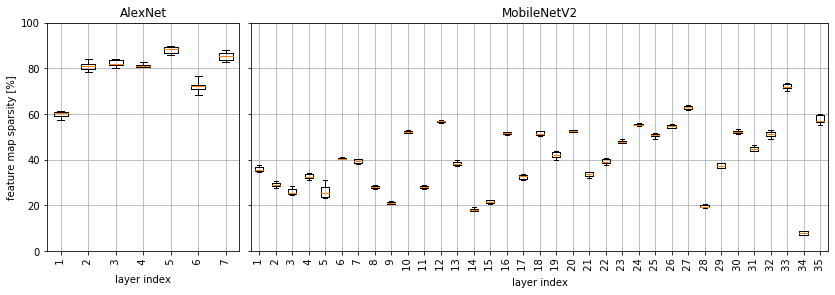

In [13]:
fig, axarr = plt.subplots(ncols=2, figsize=(10*7/5,3*7/5), #figsize=(10,3), 
                          gridspec_kw={'width_ratios': [1, 3], 'wspace': 0.03}, 
                          sharey=True, squeeze=True)
for axidx, (sparsitiesOutp, netName) in enumerate(zip([sparsitiesOutpAlexNet, sparsitiesOutpMobileNetV2], 
                                       ['AlexNet', 'MobileNetV2'])):
    plt.sca(axarr[axidx])
    layerNames = ['%3d' % (lid+1) for lid in range(len(sparsitiesOutp))] # 'Layer %d'
    plt.boxplot(sparsitiesOutp, labels=layerNames, whis=[1,99], showfliers=False)
    axarr[axidx].label_outer()
    plt.grid()
    plt.xlabel('layer index')
    if axidx == 0:
        plt.ylabel('feature map sparsity [%]')
        plt.ylim(bottom=0, top=100)
    plt.xticks(rotation=90)
    plt.title(netName)
plt.savefig('figs/sparsityByLayer-boxplot-joint.pdf', bbox_inches='tight', pad_inches=0.0)